# Import necessary libraries and modules

In [1]:
!pip install xgboost

In [2]:
!pip install squarify

In [3]:
#!pip install imbalanced-learn

In [4]:
#!pip uninstall imbalanced-learn 
!python -m pip uninstall -y imbalanced-learn


Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0


In [5]:
!pip install scikit-learn==0.24.2

  Using cached scikit_learn-0.24.2-cp39-cp39-macosx_10_13_x86_64.whl (7.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [6]:
!pip install imblearn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached scikit_learn-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl (10.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
#from pywaffle import Waffle
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
    
from nltk.corpus import stopwords

import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.naive_bayes import MultinomialNB

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

import plotly.express as px
import warnings


from sklearn.neighbors import KNeighborsClassifier
import imblearn
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.optimizers import Adam
# outdated: from keras.preprocessing import sequence 
from keras.utils.data_utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

import squarify
from sklearn.metrics import f1_score

import nltk
from nltk.stem import WordNetLemmatizer

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
2023-08-31 15:54:14.519475: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Assembling the Dataset 

In [8]:
df = pd.read_csv('mbti_1.csv')
#df = pd.read_csv('mbti_1.csv', index_col=False)
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [9]:
# count data for each personality type 
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [10]:
def clean_data(x):
    data_length=[]
    wnl=WordNetLemmatizer()
    cleaned_text=[]
    stop_words = set(stopwords.words('english')) # Load stop words
    mbti_types = [ "ISTJ", "ESFJ", "ISTJ","ISFP",
                  "ESTJ", "ESFP", "ENFP","ISTP",
                  "INFP", "ESTP", "INTP", "ENTP", 
                  "ENFJ", "INTJ", "ENTJ", "INFJ" ]
    mbti_types = [t.lower() for t in mbti_types]
    
    for sent in df.posts:
        
        # Case Standardisation
        sent=sent.lower()
        
        # Remove URLs
        # source: Gabriel Giraldo-Wingler https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
        sent=re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*',' ',sent)
        
        # Remove punctuations
        sent=re.sub('[^0-9a-z]',' ',sent)
        
        # Remove stop words
        sent = " ".join([word for word in sent.split() if word not in stop_words]) 
        
        for t in mbti_types:
            sent = re.sub(t, '', sent)
            
        # Lemmatize
        sent = wnl.lemmatize(sent) 
        
        data_length.append(len(sent.split())) #Split data, measure length of new filtered data
        
        cleaned_text.append(sent)
        
    return cleaned_text,data_length

In [11]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [12]:
df_clean = df
df_clean.posts,df_clean_length=clean_data(df)
df_clean

,type,posts
0,INFJ,jpg moments sportscenter top ten plays prank...
1,ENTP,finding lack posts alarming sex boring positio...
2,INTP,good one course say know blessing curse absolu...
3,INTJ,dear enjoyed conversation day esoteric gabbin...
4,ENTJ,fired another silly misconception approaching ...
...,...,...
8670,ISFP,ixfp always think cats fi doms reason especial...
8671,ENFP,thread already exists someplace else html post...
8672,INTP,many questions things would take purple pill p...
8673,INFP,conflicted right comes wanting children honest...


#### After cleaning data

In [13]:
df_clean.posts[0]

'jpg   moments sportscenter top ten plays pranks life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello 7 sorry hear distress natural relationship perfection time every moment existence try figure hard times times growth 84389 84390 jpg jpg welcome stuff jpg game set match prozac wellbrutin least thirty minutes moving legs mean moving sitting desk chair weed moderation maybe try edibles healthier alternative basically come three items determined type whichever types want would likely use given types cognitive functions whatnot left things moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video games growing current favorite video games cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always aroun

# Choosing a measure of success

### Baseline

A baseline model serves as a starting point for comparison in machine learning tasks, representing a simple or default approach to establish a performance benchmark.

As there are a total of 16 distinct labels in our dataset, the percentage of accuracy is 1/16 = 0.0625 or 6.25%.
We will use this value as our baseline to aim to develop a model that produces an accuracy of greater than 0.0625 in order to achieve statistical power.



# Deciding on an evaluation protocol

I will be using iterated k-fold cross validation as my evalutaion protocol as the dataset i am using only contains 8675 data and i am focusing on  developing a highly accurate model. 


<b>Iterated K-Fold Cross-Validation </b> is an extension of k-fold cross-validation. Instead of performing k-fold cross-validation just once, you repeat the process multiple times (iterations).
This approach provides a more robust estimate of your model's performance by averaging the results over multiple iterations.
It's suitable when you want to reduce the variability in your evaluation due to the randomness introduced by the data splitting.


Using iterated k-fold cross-validation sounds like a reasonable choice for your scenario. With a relatively smaller dataset and a focus on developing a highly accurate model, iterated k-fold cross-validation can provide a more robust estimate of your model's performance compared to a single round of k-fold cross-validation or hold-out validation.

By repeating the k-fold cross-validation process multiple times, you can reduce the impact of variability introduced by the random splitting of data. This can lead to a more reliable assessment of your model's ability to generalize to new, unseen data. Additionally, since your dataset is not very large, iterated k-fold cross-validation allows you to make the most out of the available data for both training and validation.

Overall, given your dataset size and the emphasis on accuracy, iterated k-fold cross-validation is a suitable choice that aligns well with our goals.

### 1. Split data into train and test sets
The dataset is divided into training and testing sets in a 80:20 ratio. The training set is used for training the model and the testing set is used as a collection of data points that will help to assess the performance of the model in generalising new, unseen data

In [14]:
X = df['posts']
y = df['type']

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(df_clean['posts'],df_clean['type'], 
                                         test_size=0.2,
                                         random_state=0, 
                                         stratify= df.type)

### 2. TF-IDF Vectorization 
This is needed to convert text data into numerical vectors based on a previously trained vectorization model (such as TF-IDF or CountVectorizer). This transformation allows text data to be used as input for machine learning algorithms that require numerical features.

In [15]:
# calculates the term frequency-inverse document frequency weights for each word in the data 

#top 5000 most frequent words as features
tfidf = TfidfVectorizer(max_features=5000, 
                        tokenizer = Lemmatizer(), #class 
                        stop_words='english')

tfidf.fit(X_train_base)
# fit TfidfVectorizer on X_train to transform into TF-IDF matrix  
# contains the TF-IDF transformed training data.
X_train_vec= tfidf.fit_transform(X_train_base).toarray() # convert it to dense array using .toarray(). 

# fit TfidfVectorizer on X_test to transform into TF-IDF matrix
X_test_vec= tfidf.transform(X_test_base).toarray()

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


In [16]:
X_train_vec

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05816291,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 3. Label Encoding 
We need to convert categorical data into numerical labels before they can be fitted into our machine learning models. Each category is assigned a unique integer.

In [17]:
# create an instance of label encoder 
labelencoder= LabelEncoder()

# train encoder based on mbti types
y_train_enc=labelencoder.fit_transform(y_train_base)
y_test_enc=labelencoder.fit_transform(y_test_base)
print("Classes:\n", labelencoder.classes_)

Classes:
 ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [18]:
y_train_enc

array([15,  8,  9, ...,  1,  9,  8])

In [19]:
y_test_enc

array([11,  3, 11, ...,  1,  9,  8])

### 4. Train and Evaluate Baseline performance

In [20]:
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc 
def train_model(model):
    model.fit(X_train_vec, y_train_enc)
    y_pred_base = model.predict(X_test_vec)
    y_prob_base = model.predict_proba(X_test_vec)
    
    print(classification_report(y_test_enc, y_pred_base))
    
    sns.set_context('notebook', font_scale=1.3)
    fig, ax=plt.subplots(1,2, figsize=(25,8))
    
    # plot confusion matrix 
    ax1= plot_confusion_matrix(y_test_enc, y_pred_base, ax=ax[0], cmap='YlGnBu')
    
    # plot ROC curve
    ax2= plot_roc(y_test_enc, y_prob_base, ax=ax[1], 
                  plot_macro=False, plot_micro=False, cmap='summer')
    
    

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhyun/op

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00        46
           3       0.17      0.01      0.01       137
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        18
           8       0.30      0.28      0.29       294
           9       0.28      0.87      0.42       366
          10       0.46      0.10      0.16       218
          11       0.41      0.42      0.41       261
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        54
          14       0.00      0.00      0.00        41
          15       0.00      0.00      0.00        67

    accuracy                           0.31      1735
   macro avg       0.10   

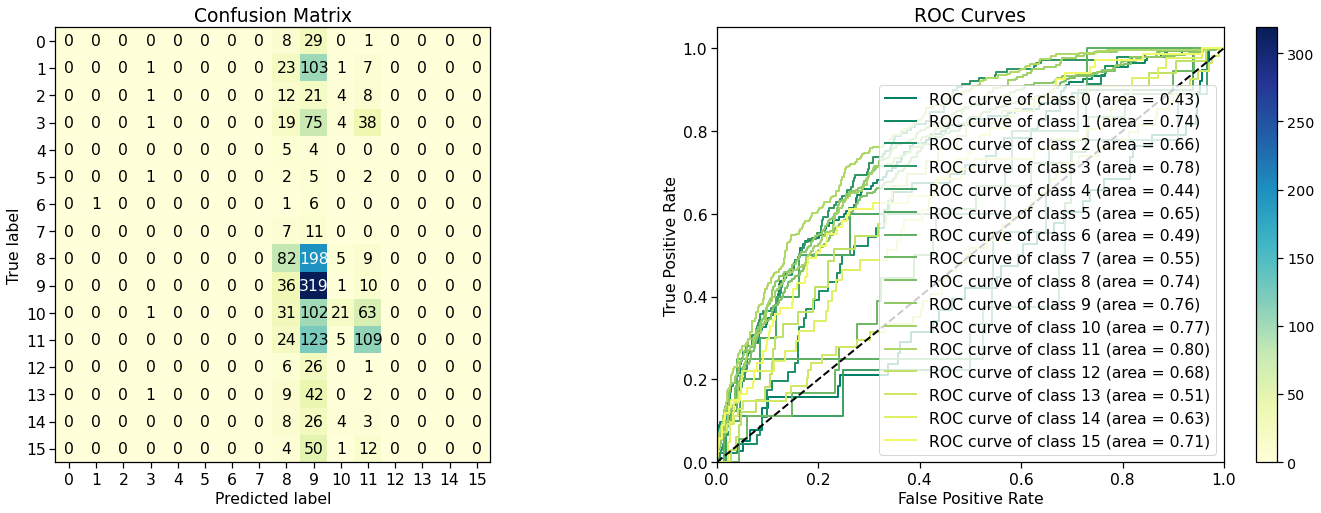

In [21]:
# Multinomial Naive Bayes classifier
nb = MultinomialNB()
train_model(nb)

# Baseline

A baseline model serves as a starting point for comparison in machine learning tasks, representing a simple or default approach to establish a performance benchmark.

As there are a total of 16 distinct labels in our dataset, the percentage of accuracy is 1/16 = 0.0625 or 6.25%. 

We will use this value as our baseline to aim to develop a model that produces an accuracy of greater than 0.0625 in order to achieve statistical power. 

# Preparing your data (for training)

Split data into training and testing sets

In [58]:
X = df['posts']
y = df['type']

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(df_clean['posts'],df_clean['type'], 
                                         test_size=0.2,
                                         random_state=0, 
                                         stratify= df.type)  

<b>Label Encoding</b>

The goal here is to classify a binary values of 0 & 1, As Machine Learning don't understand String on our target values, we will encode it

In [59]:
# create an instance of label encoder 
labelencoder= LabelEncoder()
# Fit and transform the labels to numerical format
y_train_lstm_enc = labelencoder.fit_transform(y_train_lstm)
y_test_lstm_enc = labelencoder.transform(y_test_lstm)

<b>One hot encoding</b>

The model would require categorically encoded labels where each label will be turned into a 10-element vector of zeros except for a single element. This is called one-hot encoding using to_categorical where at the position in the vector that corresponds to the label will be encoded with a one in the (n+1)th position. 

In [60]:
from keras.utils import to_categorical

# One-hot encode the target labels
y_train_lstm_onehot = to_categorical(y_train_lstm_enc)
y_test_lstm_onehot = to_categorical(y_test_lstm_enc)

# labelencoder = LabelEncoder()
# y_train_lstm_enc = labelencoder.fit_transform(y_train_lstm)
# y_train_lstm_onehot = to_categorical(y_train_lstm_enc)

Tokenize and pad texts

In [61]:
from keras.preprocessing.text import Tokenizer
max_words = 2500
max_len = 40

# ensure all sequences in a list have the same length
def tokenize_pad_sequences(text):
    # initialise text tokenizer
    tokenizer = Tokenizer(num_words=max_words, filters="")
    
    # generate word indexes
    tokenizer.fit_on_texts(text)
    
    # transforms text to a sequence of integers and apply padding 
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len) #post padding  
    
    # return sequences 
    return X, tokenizer

# print("Before tokenisation and padding: \n", df_clean['posts'][0], '\n')
# X, tokenizer = tokenize_pad_sequences(df_clean['posts'])
# print('After tokenization and padding: \n', X[0]) 

In [62]:
from keras.preprocessing.text import Tokenizer
max_words = 2500
max_len = 40

X_train_lstm_pad, tokenizer = tokenize_pad_sequences(X_train_lstm)
X_test_lstm_pad = tokenizer.texts_to_sequences(X_test_lstm)
X_test_lstm_pad = pad_sequences(X_test_lstm_pad, padding='post', maxlen=max_len)

<b> Word Embedding </b>

A word embedding is a learned representation for text where words that have the same meaning have a similar representation. It is this approach to representing words and documents that may be considered one of the key breakthroughs of deep learning on challenging natural language processing problems. 

We are using GloVe for this project

In [63]:
import os
DATA_DIR = "data"
GLOVE_PATH = os.path.join(DATA_DIR, "glove.6B.50d.txt")


# load GloVe embedding 
embeddings_index = dict()
with open(GLOVE_PATH) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefficients

In [64]:
max_words = 2500 
EMBEDDING_VECTOR_LENGTH = 50 
# create an embedding matrix 
embedding_matrix = np.zeros((max_words, EMBEDDING_VECTOR_LENGTH))
for word, index in tokenizer.word_index.items():
    if index < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

<b>Imbalanced Data</b>

To handle the imbalanced data, we will be using SMOTE to balance the class distribution.

In [65]:
# Instantiate the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=0)

# Apply SMOTE to your training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_lstm_pad, y_train_lstm_enc)

In [66]:
print('X_train_resampled', X_train_resampled.shape)
#print('X_test_lstm', X_test_lstm.shape)
print('y_train_resampled', y_train_resampled.shape)
#print('y_test_lstm', y_test_lstm.shape)

X_train_resampled (23456, 40)
y_train_resampled (23456,)


<b> Helper functions to plot accuracy and loss graphs </b>

In [31]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [32]:
def plot_mae(val_mae, num_epochs):
    average = [np.mean([x[i] for x in val_mae]) for i in range(num_epochs)]
    smooth_mae=smooth_curve(average)
    
    plt.plot(range(1, len(average)+1), average)
    plt.xlabel('Epochs')
    plt.ylabel('Smooth Validation MAE')
    plt.show()
    print('Lowest MAE occurs at epoch', np.argmin(smooth_mae))

In [33]:
def plot_loss(loss, val_loss):
    plt.clf() #clear any existing figure
    epochs = range(1, len(loss)+1) #get number of epochs
    # Calculate the average loss over epochs
    avg_loss = [np.mean(loss[:i]) for i in range(1, len(loss) + 1)]
    avg_val_loss = [np.mean(val_loss[:i]) for i in range(1, len(val_loss) + 1)]
    # assign values for each axis
    plt.plot(epochs, avg_loss, 'bo', label="Loss")
    plt.plot(epochs, avg_val_loss, 'b', label="Average Validation Loss")
    #set a title of graph and labels of each axis
    plt.title("Average Training Loss & Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.show()    

In [34]:
def plot_acc(acc, val_acc):
    plt.clf()
    epochs = range(1, len(acc)+1) #gets a number of epochs
    # Calculate the average loss over epochs
    avg_acc = [np.mean(acc[:i]) for i in range(1, len(acc) + 1)]
    avg_val_acc = [np.mean(val_acc[:i]) for i in range(1, len(val_acc) + 1)]
    
    # assign values for each axis
    plt.plot(epochs, avg_acc, 'bo', label="Accuracy")
    plt.plot(epochs, avg_val_acc, 'b', label="Average Validation Accuracy")
    #set a title of graph and labels of each axis
    plt.title("Average Training Accuracy & Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Average Accuracy')
    plt.legend()
    plt.show()     

just testing: Iterated K-fold 

In [35]:
# NUM_CLASSES = 16

# underfit_lstm_model = models.Sequential()
# underfit_lstm_model.add(layers.Dense(NUM_CLASSES, activation='softmax')) 
# underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# import numpy as np 
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import mean_absolute_error

# K=4
# num_val_samples = len(X_train_resampled)//K
# num_epochs = 80
# all_val_mae_1 = []
# all_val_mse_1 = []

# all_mae_1 = []
# all_loss_1 = []
# all_mae_history_1 = []
# all_loss_history_1 = []

# N_iterations=4
# N_folds=5

# # for i in range(N_iterations):
# #     skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
# #     for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resamp...)):
# #         print('processing fold',j)
        
# #         partial_train_data = X_train_resampled[train_index]
# #         val_data = X_train[val_index]
        
# #         partial_train_targets = y_train_resampled[train_index]
# #         val_targets = y_train_resampled[val_index]
        
# #         #train the model (in silent mode, verbose=0)
# #         results_1 = underfit_lstm_model.fit(partial_train_data, ...)
        
# #         #evaluate the model on the validation data 
# #         val_mse, val_mae = udnerfit_lstm_model.evaluate(val_data, val_targets, ver...)
# #         all_val_mae_1.append(mae)
# #         all_val_mse_1.append(mse)
        
# #         mae = results_1.history['mae']
# #         all_mae_1.append(mae)
# #         mae_history = results_1.history['val_mae']
# #         all_mae_history_1.append(mae_history)
        
# #         loss=results.history['loss']
# #         all_loss_1.append(loss)
# #         loss_history = results_1.history['val_loss']
# #         all_loss_history_1.append(loss_history)
        
# for i in range(N_iterations):
#     skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
#     for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
#         print('processing fold', j)
        
#         partial_train_data = X_train_resampled[train_index]
#         val_data = X_train_resampled[val_index]
        
#         partial_train_targets = y_train_resampled[train_index]
#         val_targets = y_train_resampled[val_index]
        
#         # One-hot encode the target labels
#         partial_train_targets = to_categorical(partial_train_targets, num_classes=NUM_CLASSES)
#         val_targets = to_categorical(val_targets, num_classes=NUM_CLASSES)
        
#         # Train the model (in silent mode, verbose=0)
#         underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["mean_absolute_error"])
#         results_1 = underfit_lstm_model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=0, validation_data = (val_data, val_targets))
        
#         # Evaluate the model on the validation data 
#         val_mse, val_mae = underfit_lstm_model.evaluate(val_data, val_targets, verbose=0)
#         all_val_mae_1.append(val_mae)
#         all_val_mse_1.append(val_mse)
        
#         mae = results_1.history['mean_absolute_error']
#         all_mae_1.append(mae)
#         mae_history = results_1.history['val_mean_absolute_error']
#         all_mae_history_1.append(mae_history)
        
#         loss = results_1.history['loss']
#         all_loss_1.append(loss)
#         loss_history = results_1.history['val_loss']
#         all_loss_history_1.append(loss_history)
        
# print("Available metrics:", results_1.history.keys())

In [37]:
# plot_mae(all_mae_history_1, num_epochs)

MAE stands for Mean Absolute Error. It's a metric used to measure the average absolute difference between the predicted values and the actual values in a regression problem. In the context of machine learning models, like the one you're working with, MAE quantifies how close the model's predictions are to the actual values.

In terms of the MAE value itself, lower is better. A lower MAE indicates that the model's predictions are closer to the actual values. Higher MAE values mean that the model's predictions are farther away from the actual values.

If the lowest MAE value cannot occur at epoch 0, it means that the model's initial predictions (at epoch 0) are not the best predictions. This is usually the case because the model starts with randomly initialized weights and biases, and it takes a few epochs of training for the model to adjust its parameters to make better predictions. As training progresses, the model learns and refines its predictions, which is why the MAE tends to improve over epochs.v

# LSTM: Developing a model that does better than the baseline

### LSTM 

(insert short explanation of LSTM)

We will be applying our chosen evaluation protocol (iterated k fold validation) when training the model.

Constants:  LSTM layer=128 

#### Building the model
- initialise model 
- add layers to model
- compile model 

In [67]:
# Initialising the model 
underfit_lstm_model = Sequential()

# Defining model: add layers 
underfit_lstm_model.add(Embedding(
    max_words,
    EMBEDDING_VECTOR_LENGTH,
    input_length=max_len,
    weights=[embedding_matrix],
    trainable=True,
)) #glove embedding
underfit_lstm_model.add(LSTM(64, input_shape=(max_len, EMBEDDING_VECTOR_LENGTH))) #LSTM layer 
underfit_lstm_model.add(Dense(16, activation='softmax')) #dense layer - the last one

# Compile model
underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(underfit_lstm_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 40, 50)            125000    
                                                                 
 lstm_6 (LSTM)               (None, 64)                29440     
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
Total params: 155,480
Trainable params: 155,480
Non-trainable params: 0
_________________________________________________________________
None


#### Train model with Iterated K-fold Validation

In [75]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

K=4
num_val_samples = len(X_train_resampled)//K
num_epochs = 1
all_val_mae_1 = []
all_val_mse_1 = []

all_mae_1 = []
all_loss_1 = []
all_mae_history_1 = []
all_loss_history_1 = []

#new!
all_val_acc_1 = []
all_val_loss_1 = []

all_acc_1 = []
all_loss_1 = []
all_acc_history_1 = []
all_loss_history_1 = []

N_iterations=4
N_folds=5
        
for i in range(N_iterations):
    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
    for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
        print('processing fold', j)
        
        partial_train_data = X_train_resampled[train_index]
        val_data = X_train_resampled[val_index]
        
        partial_train_targets = y_train_resampled[train_index]
        val_targets = y_train_resampled[val_index]
        
        # One-hot encode the target labels
        partial_train_targets = to_categorical(partial_train_targets, num_classes=16)
        val_targets = to_categorical(val_targets, num_classes=16)
        
        # Train the model (in silent mode, verbose=0)
        #underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["mean_absolute_error"])
        underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        results_1 = underfit_lstm_model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=0, validation_data = (val_data, val_targets))
        
#         # Evaluate the model on the validation data: MAE, MSE 
#         val_mse, val_mae = underfit_lstm_model.evaluate(val_data, val_targets, verbose=0)
#         all_val_mae_1.append(val_mae)
#         all_val_mse_1.append(val_mse)
        
#         mae = results_1.history['mean_absolute_error']
#         all_mae_1.append(mae)
#         mae_history = results_1.history['val_mean_absolute_error']
#         all_mae_history_1.append(mae_history)
        
#         loss = results_1.history['loss']
#         all_loss_1.append(loss)
#         loss_history = results_1.history['val_loss']
#         all_loss_history_1.append(loss_history)
        
        # Evaluate the model on the validation data: loss and accuracy 
        val_loss, val_acc = underfit_lstm_model.evaluate(val_data, val_targets, verbose=0)
        all_val_acc_1.append(val_acc)
        all_val_loss_1.append(val_loss)
        
        acc = results_1.history['accuracy']
        all_acc_1.append(acc)
        acc_history = results_1.history['val_accuracy']
        all_acc_history_1.append(acc_history)
        
        loss = results_1.history['loss']
        all_loss_1.append(loss)
        loss_history = results_1.history['val_loss']
        all_loss_history_1.append(loss_history)

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4


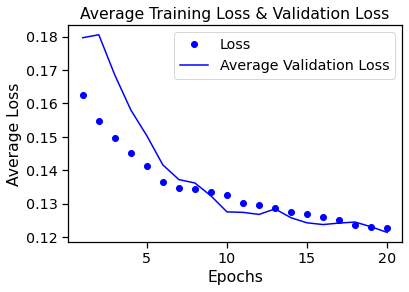

In [76]:
plot_loss(all_loss_1, all_loss_history_1)

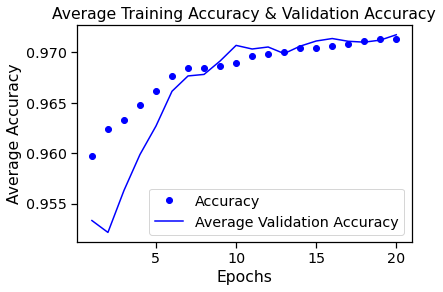

In [77]:
plot_acc(all_acc_1, all_acc_history_1)

In [78]:
print("Average Loss:", np.mean(all_val_loss_1))
print("Average Accuracy:", np.mean(all_val_acc_1))

Average Loss: 0.12134766019880772
Average Accuracy: 0.9717450588941574


In [71]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

K=4
num_val_samples = len(X_train_resampled)//K
num_epochs = 5
all_val_mae_1 = []
all_val_mse_1 = []

all_mae_1 = []
all_loss_1 = []
all_mae_history_1 = []
all_loss_history_1 = []

#new!
all_val_acc_1 = []
all_val_loss_1 = []

all_acc_1 = []
all_loss_1 = []
all_acc_history_1 = []
all_loss_history_1 = []

N_iterations=4
N_folds=5
        
for i in range(N_iterations):
    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
    for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
        print('processing fold', j)
        
        partial_train_data = X_train_resampled[train_index]
        val_data = X_train_resampled[val_index]
        
        partial_train_targets = y_train_resampled[train_index]
        val_targets = y_train_resampled[val_index]
        
        # One-hot encode the target labels
        partial_train_targets = to_categorical(partial_train_targets, num_classes=16)
        val_targets = to_categorical(val_targets, num_classes=16)
        
        # Train the model (in silent mode, verbose=0)
        #underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["mean_absolute_error"])
        underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        results_1 = underfit_lstm_model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=0, validation_data = (val_data, val_targets))
        
#         # Evaluate the model on the validation data: MAE, MSE 
#         val_mse, val_mae = underfit_lstm_model.evaluate(val_data, val_targets, verbose=0)
#         all_val_mae_1.append(val_mae)
#         all_val_mse_1.append(val_mse)
        
#         mae = results_1.history['mean_absolute_error']
#         all_mae_1.append(mae)
#         mae_history = results_1.history['val_mean_absolute_error']
#         all_mae_history_1.append(mae_history)
        
#         loss = results_1.history['loss']
#         all_loss_1.append(loss)
#         loss_history = results_1.history['val_loss']
#         all_loss_history_1.append(loss_history)
        
        # Evaluate the model on the validation data: loss and accuracy 
        val_loss, val_acc = underfit_lstm_model.evaluate(val_data, val_targets, verbose=0)
        all_val_acc_1.append(val_acc)
        all_val_loss_1.append(val_loss)
        
        acc = results_1.history['accuracy']
        all_acc_1.append(acc)
        acc_history = results_1.history['val_accuracy']
        all_acc_history_1.append(acc_history)
        
        loss = results_1.history['loss']
        all_loss_1.append(loss)
        loss_history = results_1.history['val_loss']
        all_loss_history_1.append(loss_history)

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4


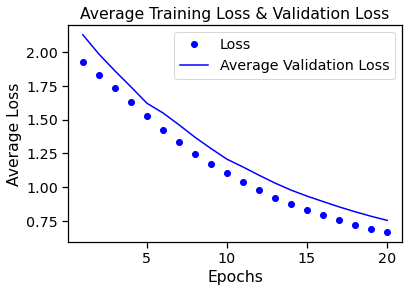

In [72]:
plot_loss(all_loss_1, all_loss_history_1)

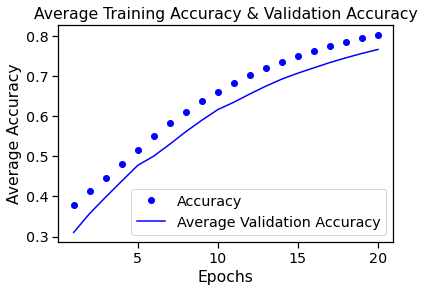

In [73]:
plot_acc(all_acc_1, all_acc_history_1)

In [74]:
print("Average Loss:", np.mean(all_val_loss_1))
print("Average Accuracy:", np.mean(all_val_acc_1))

Average Loss: 0.8238244190812111
Average Accuracy: 0.7379287168383598


In [ ]:
# kfold cross validation (NOT iterated)

# from sklearn.model_selection import KFold

# K = 5  # Number of folds
# num_epochs = 1
# all_val_mae = []
# all_mae = []
# all_loss = []
# all_mae_history = []
# all_loss_history = []

# kf = KFold(n_splits=K, shuffle=True)

# for i, (train_index, val_index) in enumerate(kf.split(X_train_resampled)):
#     print('processing fold', i)
    
#     partial_train_data = X_train_resampled[train_index]
#     val_data = X_train_resampled[val_index]
    
#     partial_train_targets = y_train_resampled[train_index]
#     val_targets = y_train_resampled[val_index]
    
#     # One-hot encode the target labels
#     partial_train_targets = to_categorical(partial_train_targets, num_classes=NUM_CLASSES)
#     val_targets = to_categorical(val_targets, num_classes=NUM_CLASSES)
    
#     # Train the model (in silent mode, verbose=0)
#     underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["mean_absolute_error"])
#     results = underfit_lstm_model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=0, validation_data=(val_data, val_targets))
    
#     # Evaluate the model on the validation data 
#     val_mae = underfit_lstm_model.evaluate(val_data, val_targets, verbose=0)[1]  # 1 represents mean_absolute_error
#     all_val_mae.append(val_mae)
    
#     mae_history = results.history['mean_absolute_error']
#     all_mae_history.append(mae_history)
    
#     loss_history = results.history['loss']
#     all_loss_history.append(loss_history)

# print("Average MAE:", np.mean(all_val_mae))

# LSTM: Developing a model that overfits/scaled up
After developing a model that is able to do better than the baseline, we need to develop a model that overfits/scaled up. As the aim of this project is to create a model that stands on the line between overfitting and underfitting, we now need to cross the line to develop a model that overfits. 

We will be developing an overfitting model by <b>increasing the number of dense layers</b> from 1 to 4. 

In [79]:
# max_len = 40
# EMBEDDING_VECTOR_LENGTH = 50

# Initialising the model 
overfit_lstm_model = Sequential()

# Defining model: add layers 
overfit_lstm_model.add(Embedding(
    max_words,
    EMBEDDING_VECTOR_LENGTH,
    input_length=max_len,
    weights=[embedding_matrix],
    trainable=True,
)) #glove embedding
overfit_lstm_model.add(LSTM(64, input_shape=(max_len, EMBEDDING_VECTOR_LENGTH))) #LSTM layer
overfit_lstm_model.add(Dense(256, activation='relu')) # Additional dense layer
overfit_lstm_model.add(Dense(128, activation='relu')) # Additional dense layer
overfit_lstm_model.add(Dense(64, activation='relu')) # Additional dense layer
overfit_lstm_model.add(Dense(16, activation='softmax')) #dense layer - the last one


# Compile model
overfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(overfit_lstm_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 40, 50)            125000    
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dense_9 (Dense)             (None, 256)               16640     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 16)                1040      
                                                                 
Total params: 213,272
Trainable params: 213,272
Non-tr

#### Train model with Iterated K-fold Validation 

In [81]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

K=4
num_val_samples = len(X_train_resampled)//K
num_epochs = 5

#new!
all_val_acc_2 = []
all_val_loss_2 = []

all_acc_2 = []
all_loss_2 = []
all_acc_history_2 = []
all_loss_history_2 = []

N_iterations=4
N_folds=5
        
for i in range(N_iterations):
    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
    for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
        print('processing fold', j)
        
        partial_train_data = X_train_resampled[train_index]
        val_data = X_train_resampled[val_index]
        
        partial_train_targets = y_train_resampled[train_index]
        val_targets = y_train_resampled[val_index]
        
        # One-hot encode the target labels
        partial_train_targets = to_categorical(partial_train_targets, num_classes=16)
        val_targets = to_categorical(val_targets, num_classes=16)
        
        # Train the model (in silent mode, verbose=0)
        overfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        results_2 = overfit_lstm_model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=0, validation_data = (val_data, val_targets))
        
        # Evaluate the model on the validation data: loss and accuracy 
        val_loss, val_acc = overfit_lstm_model.evaluate(val_data, val_targets, verbose=0)
        all_val_acc_2.append(val_acc)
        all_val_loss_2.append(val_loss)
        
        acc = results_2.history['accuracy']
        all_acc_2.append(acc)
        acc_history = results_2.history['val_accuracy']
        all_acc_history_2.append(acc_history)
        
        loss = results_2.history['loss']
        all_loss_2.append(loss)
        loss_history = results_2.history['val_loss']
        all_loss_history_2.append(loss_history)

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4


In [ ]:
#print("Average MAE:", np.mean(all_val_mae_1))

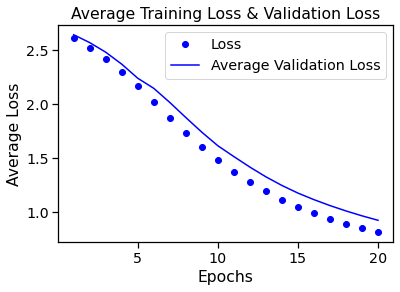

In [82]:
plot_loss(all_loss_2, all_loss_history_2)

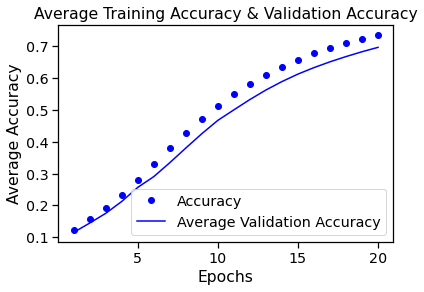

In [86]:
plot_acc(all_acc_2, all_acc_history_2)

In [84]:
print("Average Loss:", np.mean(all_val_loss_2))
print("Average Accuracy:", np.mean(all_val_acc_2))

Average Loss: 1.05213613063097
Average Accuracy: 0.6571281850337982


From the results above, we can see that the average accuracy for the underfitting model (0.738) was higher than the overfititing model (0.657). The average loss for the underfitting model (0.824) was also lower than the overfitting model(1.05). 

The accuracy decreased and loss increased when number of epochs was increased from 1 to 5 and more dense layers were added to the LSTM model. 

However, we will continue to work with our overfitting model for hyperparameter optimisation. The number of epochs we have used in training the neural network is very small as it takes extremely long to run the training if the number of epochs exceeds 5. Hence, we will take the larger number of epochs we have tested above. In reality, the epoch number should be much higher to ensure better training. 

# LSTM: Regularising your model and tuning your hyperparameters
After creating a model that overfits, we need to modify the model to increase the peformance of the model. We can do this by regularising the model and iteratively fine tune our hyperparameters until we determine the optimal hyperparameter settings that results in the best performing machine learning model.

There are many ways to regularise the model. For our project, we will be tuning:
1. Dropout 
2. L1/L2 regularizers. 

We will be testing 2 different values for each hyperparameter and compare the performance between them to determine the optimal setting for both dropout and L1/L2 regularizers.

Finally, we will apply both dropout and L1/L2 regularizer with the hyperparameter values we found earlier to our LSTM model to develop the final LSTM model.

### 1. Dropout

By adding dropout layers, you introduce some randomness during training, which can help prevent the model from relying too heavily on any single feature and reduce overfitting. 

#### Build model with Dropout = 0.1

In [89]:
### DROP OUT = 0.1 ###

from tensorflow.keras.layers import Dropout

# Initialising the model 
lstm_model_1 = Sequential()

# Defining model: add layers 
lstm_model_1.add(Embedding(
    max_words,
    EMBEDDING_VECTOR_LENGTH,
    input_length=max_len,
    weights=[embedding_matrix],
    trainable=True,
)) #glove embedding
lstm_model_1.add(LSTM(64, input_shape=(max_len, EMBEDDING_VECTOR_LENGTH))) #LSTM layer
lstm_model_1.add(Dropout(0.1))
lstm_model_1.add(Dense(256, activation='relu')) # Additional dense layer
lstm_model_1.add(Dense(128, activation='relu')) # Additional dense layer
lstm_model_1.add(Dropout(0.1))
lstm_model_1.add(Dense(64, activation='relu')) # Additional dense layer
lstm_model_1.add(Dense(16, activation='softmax')) #dense layer - the last one


# Compile model
lstm_model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(lstm_model_1.summary())


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 40, 50)            125000    
                                                                 
 lstm_9 (LSTM)               (None, 64)                29440     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 256)               16640     
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)               

#### Train model with Dropout = 0.1

In [91]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

K=4
num_val_samples = len(X_train_resampled)//K
num_epochs = 5

#new!
all_val_acc_3 = []
all_val_loss_3 = []

all_acc_3 = []
all_loss_3 = []
all_acc_history_3 = []
all_loss_history_3 = []

N_iterations=4
N_folds=5
        
for i in range(N_iterations):
    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
    for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
        print('processing fold', j)
        
        partial_train_data = X_train_resampled[train_index]
        val_data = X_train_resampled[val_index]
        
        partial_train_targets = y_train_resampled[train_index]
        val_targets = y_train_resampled[val_index]
        
        # One-hot encode the target labels
        partial_train_targets = to_categorical(partial_train_targets, num_classes=16)
        val_targets = to_categorical(val_targets, num_classes=16)
        
        # Train the model 
        lstm_model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        results_3 = lstm_model_1.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=2, validation_data = (val_data, val_targets))
        
        # Evaluate the model on the validation data: loss and accuracy 
        val_loss, val_acc = lstm_model_1.evaluate(val_data, val_targets, verbose=0)
        all_val_acc_3.append(val_acc)
        all_val_loss_3.append(val_loss)
        
        acc = results_3.history['accuracy']
        all_acc_3.append(acc)
        acc_history = results_3.history['val_accuracy']
        all_acc_history_3.append(acc_history)
        
        loss = results_3.history['loss']
        all_loss_3.append(loss)
        loss_history = results_3.history['val_loss']
        all_loss_history_3.append(loss_history)

processing fold 0
Epoch 1/5
147/147 - 12s - loss: 2.1887 - accuracy: 0.2697 - val_loss: 2.0934 - val_accuracy: 0.3027 - 12s/epoch - 79ms/step
Epoch 2/5
147/147 - 9s - loss: 2.1407 - accuracy: 0.2836 - val_loss: 2.0436 - val_accuracy: 0.3193 - 9s/epoch - 60ms/step
Epoch 3/5
147/147 - 6s - loss: 2.0864 - accuracy: 0.3008 - val_loss: 1.9962 - val_accuracy: 0.3396 - 6s/epoch - 44ms/step
Epoch 4/5
147/147 - 8s - loss: 2.0424 - accuracy: 0.3173 - val_loss: 1.9379 - val_accuracy: 0.3564 - 8s/epoch - 53ms/step
Epoch 5/5
147/147 - 7s - loss: 1.9883 - accuracy: 0.3314 - val_loss: 1.9048 - val_accuracy: 0.3801 - 7s/epoch - 49ms/step
processing fold 1
Epoch 1/5
147/147 - 10s - loss: 2.0424 - accuracy: 0.3211 - val_loss: 1.9060 - val_accuracy: 0.3737 - 10s/epoch - 68ms/step
Epoch 2/5
147/147 - 5s - loss: 1.9714 - accuracy: 0.3415 - val_loss: 1.9135 - val_accuracy: 0.3592 - 5s/epoch - 36ms/step
Epoch 3/5
147/147 - 5s - loss: 1.9181 - accuracy: 0.3577 - val_loss: 1.9565 - val_accuracy: 0.3407 - 5s/ep

147/147 - 8s - loss: 0.6937 - accuracy: 0.7662 - val_loss: 0.2888 - val_accuracy: 0.9265 - 8s/epoch - 55ms/step
Epoch 2/5
147/147 - 6s - loss: 0.6270 - accuracy: 0.7902 - val_loss: 0.3379 - val_accuracy: 0.9090 - 6s/epoch - 40ms/step
Epoch 3/5
147/147 - 6s - loss: 0.6101 - accuracy: 0.7932 - val_loss: 0.3456 - val_accuracy: 0.8962 - 6s/epoch - 39ms/step
Epoch 4/5
147/147 - 5s - loss: 0.5948 - accuracy: 0.7994 - val_loss: 0.3708 - val_accuracy: 0.8872 - 5s/epoch - 35ms/step
Epoch 5/5
147/147 - 6s - loss: 0.5569 - accuracy: 0.8123 - val_loss: 0.3977 - val_accuracy: 0.8734 - 6s/epoch - 42ms/step
processing fold 4
Epoch 1/5
147/147 - 8s - loss: 0.6308 - accuracy: 0.7864 - val_loss: 0.2494 - val_accuracy: 0.9446 - 8s/epoch - 57ms/step
Epoch 2/5
147/147 - 5s - loss: 0.5774 - accuracy: 0.8056 - val_loss: 0.2613 - val_accuracy: 0.9343 - 5s/epoch - 37ms/step
Epoch 3/5
147/147 - 5s - loss: 0.5643 - accuracy: 0.8096 - val_loss: 0.3076 - val_accuracy: 0.9124 - 5s/epoch - 36ms/step
Epoch 4/5
147/14

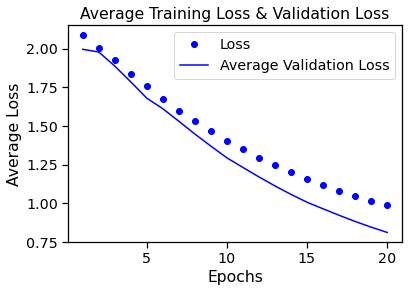

In [92]:
plot_loss(all_loss_3, all_loss_history_3)

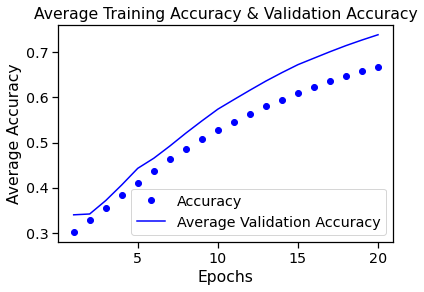

In [94]:
plot_acc(all_acc_3, all_acc_history_3)

In [93]:
print("Average Loss:", np.mean(all_val_loss_3))
print("Average Accuracy:", np.mean(all_val_acc_3))

Average Loss: 0.8885290160775184
Average Accuracy: 0.7059536874294281


#### Build Model with Dropout=0.5

In [95]:
### DROP OUT = 0.5 ###

from tensorflow.keras.layers import Dropout

# Initialising the model 
lstm_model_2 = Sequential()

# Defining model: add layers 
lstm_model_2.add(Embedding(
    max_words,
    EMBEDDING_VECTOR_LENGTH,
    input_length=max_len,
    weights=[embedding_matrix],
    trainable=True,
)) #glove embedding
lstm_model_2.add(LSTM(64, input_shape=(max_len, EMBEDDING_VECTOR_LENGTH))) #LSTM layer
lstm_model_2.add(Dropout(0.5))
lstm_model_2.add(Dense(256, activation='relu')) # Additional dense layer
lstm_model_2.add(Dense(128, activation='relu')) # Additional dense layer
lstm_model_2.add(Dropout(0.5))
lstm_model_2.add(Dense(64, activation='relu')) # Additional dense layer
lstm_model_2.add(Dense(16, activation='softmax')) #dense layer - the last one


# Compile model
lstm_model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(lstm_model_2.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 40, 50)            125000    
                                                                 
 lstm_10 (LSTM)              (None, 64)                29440     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 256)               16640     
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)              

In [96]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

K=4
num_val_samples = len(X_train_resampled)//K
num_epochs = 5

#new!
all_val_acc_4 = []
all_val_loss_4 = []

all_acc_4 = []
all_loss_4 = []
all_acc_history_4 = []
all_loss_history_4 = []

N_iterations=4
N_folds=5
        
for i in range(N_iterations):
    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
    for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
        print('processing fold', j)
        
        partial_train_data = X_train_resampled[train_index]
        val_data = X_train_resampled[val_index]
        
        partial_train_targets = y_train_resampled[train_index]
        val_targets = y_train_resampled[val_index]
        
        # One-hot encode the target labels
        partial_train_targets = to_categorical(partial_train_targets, num_classes=16)
        val_targets = to_categorical(val_targets, num_classes=16)
        
        # Train the model 
        lstm_model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        results_4 = lstm_model_2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=2, validation_data = (val_data, val_targets))
        
        # Evaluate the model on the validation data: loss and accuracy 
        val_loss, val_acc = lstm_model_2.evaluate(val_data, val_targets, verbose=0)
        all_val_acc_4.append(val_acc)
        all_val_loss_4.append(val_loss)
        
        acc = results_4.history['accuracy']
        all_acc_4.append(acc)
        acc_history = results_4.history['val_accuracy']
        all_acc_history_4.append(acc_history)
        
        loss = results_4.history['loss']
        all_loss_4.append(loss)
        loss_history = results_4.history['val_loss']
        all_loss_history_4.append(loss_history)

processing fold 0
Epoch 1/5
147/147 - 12s - loss: 2.7751 - accuracy: 0.0649 - val_loss: 2.7721 - val_accuracy: 0.0627 - 12s/epoch - 78ms/step
Epoch 2/5
147/147 - 6s - loss: 2.7727 - accuracy: 0.0624 - val_loss: 2.7683 - val_accuracy: 0.0744 - 6s/epoch - 43ms/step
Epoch 3/5
147/147 - 9s - loss: 2.7489 - accuracy: 0.0823 - val_loss: 2.7128 - val_accuracy: 0.0934 - 9s/epoch - 60ms/step
Epoch 4/5
147/147 - 9s - loss: 2.6824 - accuracy: 0.1041 - val_loss: 2.6456 - val_accuracy: 0.1093 - 9s/epoch - 59ms/step
Epoch 5/5
147/147 - 6s - loss: 2.6203 - accuracy: 0.1137 - val_loss: 2.6169 - val_accuracy: 0.1123 - 6s/epoch - 43ms/step
processing fold 1
Epoch 1/5
147/147 - 11s - loss: 2.6016 - accuracy: 0.1178 - val_loss: 2.5721 - val_accuracy: 0.1249 - 11s/epoch - 73ms/step
Epoch 2/5
147/147 - 8s - loss: 2.5788 - accuracy: 0.1237 - val_loss: 2.5627 - val_accuracy: 0.1288 - 8s/epoch - 56ms/step
Epoch 3/5
147/147 - 6s - loss: 2.5644 - accuracy: 0.1254 - val_loss: 2.5760 - val_accuracy: 0.1247 - 6s/ep

147/147 - 9s - loss: 1.9167 - accuracy: 0.3025 - val_loss: 1.8368 - val_accuracy: 0.3453 - 9s/epoch - 59ms/step
Epoch 2/5
147/147 - 5s - loss: 1.8936 - accuracy: 0.3106 - val_loss: 1.8427 - val_accuracy: 0.3485 - 5s/epoch - 34ms/step
Epoch 3/5
147/147 - 5s - loss: 1.8681 - accuracy: 0.3181 - val_loss: 1.8705 - val_accuracy: 0.3283 - 5s/epoch - 34ms/step
Epoch 4/5
147/147 - 5s - loss: 1.8572 - accuracy: 0.3205 - val_loss: 1.8566 - val_accuracy: 0.3302 - 5s/epoch - 35ms/step
Epoch 5/5
147/147 - 5s - loss: 1.8377 - accuracy: 0.3229 - val_loss: 1.8963 - val_accuracy: 0.3157 - 5s/epoch - 34ms/step
processing fold 4
Epoch 1/5
147/147 - 9s - loss: 1.8870 - accuracy: 0.3127 - val_loss: 1.7242 - val_accuracy: 0.3829 - 9s/epoch - 61ms/step
Epoch 2/5
147/147 - 7s - loss: 1.8502 - accuracy: 0.3277 - val_loss: 1.8171 - val_accuracy: 0.3306 - 7s/epoch - 51ms/step
Epoch 3/5
147/147 - 7s - loss: 1.8303 - accuracy: 0.3316 - val_loss: 1.7476 - val_accuracy: 0.3743 - 7s/epoch - 48ms/step
Epoch 4/5
147/14

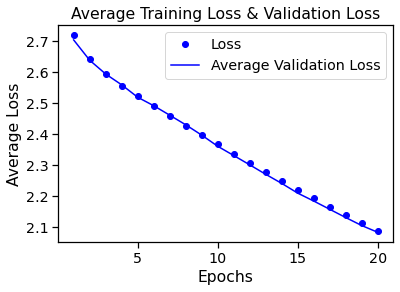

In [97]:
plot_loss(all_loss_4, all_loss_history_4)

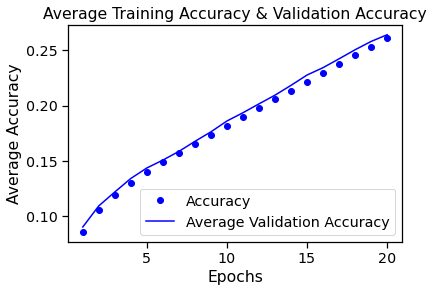

In [98]:
plot_acc(all_acc_4, all_acc_history_4)

In [99]:
print("Average Loss:", np.mean(all_val_loss_4))
print("Average Accuracy:", np.mean(all_val_acc_4))

Average Loss: 2.1033923029899597
Average Accuracy: 0.25653507336974146


The average accuracy for Dropout=0.1 (0.706) is almost three times higher than that of Dropout=0.5(0.257). The average loss of the former (0.889) is also close to just a third of the latter (2.10).

Based on the results on our LSTM models with Dropout=0.1 and Dropout=0.5, we can see clearly see that a smaller dropout value of 0.1 is much better than dropout=0.5.

### 2. L1/L2 Regularizers

#### Build the Model with L1/L2 Regularizers = 0.1

In [111]:
### L1/L2 Regularizer = 0.1 ###

from keras import regularizers

# Initialising the model 
lstm_model_3 = Sequential()

# Defining model: add layers 
lstm_model_3.add(Embedding(
    max_words,
    EMBEDDING_VECTOR_LENGTH,
    input_length=max_len,
    weights=[embedding_matrix],
    trainable=True,
)) #glove embedding
lstm_model_3.add(LSTM(64, input_shape=(max_len, EMBEDDING_VECTOR_LENGTH))) #LSTM layer
lstm_model_3.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1))) 
lstm_model_3.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1))) 
lstm_model_3.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1))) 
lstm_model_3.add(Dense(16, activation='softmax')) #dense layer - the last one


# Compile model
lstm_model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(lstm_model_3.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 40, 50)            125000    
                                                                 
 lstm_16 (LSTM)              (None, 64)                29440     
                                                                 
 dense_41 (Dense)            (None, 256)               16640     
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 16)                1040      
                                                                 
Total params: 213,272
Trainable params: 213,272
Non-t

#### Train the Model with L1/L2 Regularizers = 0.1

In [112]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

K=4
num_val_samples = len(X_train_resampled)//K
num_epochs = 5

#new!
all_val_acc_5 = []
all_val_loss_5 = []

all_acc_5 = []
all_loss_5 = []
all_acc_history_5 = []
all_loss_history_5 = []

N_iterations=4
N_folds=5
        
for i in range(N_iterations):
    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
    for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
        print('processing fold', j)
        
        partial_train_data = X_train_resampled[train_index]
        val_data = X_train_resampled[val_index]
        
        partial_train_targets = y_train_resampled[train_index]
        val_targets = y_train_resampled[val_index]
        
        # One-hot encode the target labels
        partial_train_targets = to_categorical(partial_train_targets, num_classes=16)
        val_targets = to_categorical(val_targets, num_classes=16)
        
        # Train the model 
        lstm_model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        results_5 = lstm_model_3.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=2, validation_data = (val_data, val_targets))
        
        # Evaluate the model on the validation data: loss and accuracy 
        val_loss, val_acc = lstm_model_3.evaluate(val_data, val_targets, verbose=0)
        all_val_acc_5.append(val_acc)
        all_val_loss_5.append(val_loss)
        
        acc = results_5.history['accuracy']
        all_acc_5.append(acc)
        acc_history = results_5.history['val_accuracy']
        all_acc_history_5.append(acc_history)
        
        loss = results_5.history['loss']
        all_loss_5.append(loss)
        loss_history = results_5.history['val_loss']
        all_loss_history_5.append(loss_history)

processing fold 0
Epoch 1/5
147/147 - 10s - loss: 138.9376 - accuracy: 0.0602 - val_loss: 7.4442 - val_accuracy: 0.0624 - 10s/epoch - 67ms/step
Epoch 2/5
147/147 - 7s - loss: 3.9177 - accuracy: 0.0609 - val_loss: 3.5063 - val_accuracy: 0.0624 - 7s/epoch - 47ms/step
Epoch 3/5
147/147 - 6s - loss: 3.5041 - accuracy: 0.0601 - val_loss: 3.4983 - val_accuracy: 0.0627 - 6s/epoch - 40ms/step
Epoch 4/5
147/147 - 5s - loss: 3.4987 - accuracy: 0.0607 - val_loss: 3.4962 - val_accuracy: 0.0627 - 5s/epoch - 35ms/step
Epoch 5/5
147/147 - 5s - loss: 3.4937 - accuracy: 0.0599 - val_loss: 3.4928 - val_accuracy: 0.0624 - 5s/epoch - 33ms/step
processing fold 1
Epoch 1/5
147/147 - 8s - loss: 3.5478 - accuracy: 0.0588 - val_loss: 3.4472 - val_accuracy: 0.0625 - 8s/epoch - 53ms/step
Epoch 2/5
147/147 - 5s - loss: 3.3852 - accuracy: 0.0592 - val_loss: 3.2948 - val_accuracy: 0.0625 - 5s/epoch - 35ms/step
Epoch 3/5
147/147 - 5s - loss: 3.3840 - accuracy: 0.0601 - val_loss: 3.3353 - val_accuracy: 0.0625 - 5s/ep

147/147 - 8s - loss: 3.5330 - accuracy: 0.0574 - val_loss: 3.6939 - val_accuracy: 0.0625 - 8s/epoch - 52ms/step
Epoch 2/5
147/147 - 5s - loss: 3.3379 - accuracy: 0.0594 - val_loss: 3.1988 - val_accuracy: 0.0625 - 5s/epoch - 33ms/step
Epoch 3/5
147/147 - 5s - loss: 3.3511 - accuracy: 0.0602 - val_loss: 3.2598 - val_accuracy: 0.0625 - 5s/epoch - 36ms/step
Epoch 4/5
147/147 - 5s - loss: 3.4685 - accuracy: 0.0579 - val_loss: 3.4622 - val_accuracy: 0.0625 - 5s/epoch - 35ms/step
Epoch 5/5
147/147 - 5s - loss: 3.4620 - accuracy: 0.0598 - val_loss: 3.5868 - val_accuracy: 0.0625 - 5s/epoch - 35ms/step
processing fold 4
Epoch 1/5
147/147 - 8s - loss: 3.5609 - accuracy: 0.0605 - val_loss: 3.6507 - val_accuracy: 0.0625 - 8s/epoch - 53ms/step
Epoch 2/5
147/147 - 7s - loss: 3.3172 - accuracy: 0.0597 - val_loss: 3.1510 - val_accuracy: 0.0625 - 7s/epoch - 45ms/step
Epoch 3/5
147/147 - 7s - loss: 3.3341 - accuracy: 0.0585 - val_loss: 3.2152 - val_accuracy: 0.0625 - 7s/epoch - 48ms/step
Epoch 4/5
147/14

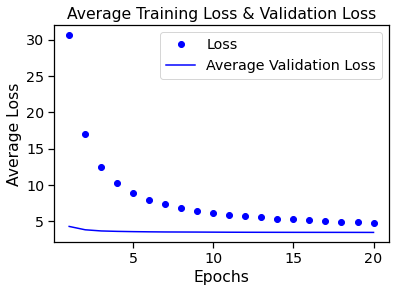

In [113]:
plot_loss(all_loss_5, all_loss_history_5)

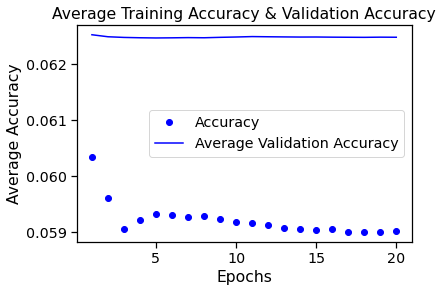

In [114]:
plot_acc(all_acc_5, all_acc_history_5)

In [115]:
print("Average Loss:", np.mean(all_val_loss_5))
print("Average Accuracy:", np.mean(all_val_acc_5))

Average Loss: 3.5362332105636596
Average Accuracy: 0.06248934213072062


#### Build the Model with L1/L2 Regularizers = 0.005

In [120]:
### L1/L2 Regularizer = 0.001 ###

from keras import regularizers

# Initialising the model 
lstm_model_4 = Sequential()

# Defining model: add layers 
lstm_model_4.add(Embedding(
    max_words,
    EMBEDDING_VECTOR_LENGTH,
    input_length=max_len,
    weights=[embedding_matrix],
    trainable=True,
)) #glove embedding
lstm_model_4.add(LSTM(64, input_shape=(max_len, EMBEDDING_VECTOR_LENGTH))) #LSTM layer
lstm_model_4.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
lstm_model_4.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
lstm_model_4.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
lstm_model_4.add(Dense(16, activation='softmax')) #dense layer - the last one


# Compile model
lstm_model_4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(lstm_model_4.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 40, 50)            125000    
                                                                 
 lstm_19 (LSTM)              (None, 64)                29440     
                                                                 
 dense_53 (Dense)            (None, 256)               16640     
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 16)                1040      
                                                                 
Total params: 213,272
Trainable params: 213,272
Non-t

#### Train the Model with L1/L2 Regularizers = 0.001

In [121]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

K=4
num_val_samples = len(X_train_resampled)//K
num_epochs = 5

#new!
all_val_acc_6 = []
all_val_loss_6 = []

all_acc_6 = []
all_loss_6 = []
all_acc_history_6 = []
all_loss_history_6 = []

N_iterations=4
N_folds=5
        
for i in range(N_iterations):
    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
    for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
        print('processing fold', j)
        
        partial_train_data = X_train_resampled[train_index]
        val_data = X_train_resampled[val_index]
        
        partial_train_targets = y_train_resampled[train_index]
        val_targets = y_train_resampled[val_index]
        
        # One-hot encode the target labels
        partial_train_targets = to_categorical(partial_train_targets, num_classes=16)
        val_targets = to_categorical(val_targets, num_classes=16)
        
        # Train the model 
        lstm_model_4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        results_6 = lstm_model_4.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=2, validation_data = (val_data, val_targets))
        
        # Evaluate the model on the validation data: loss and accuracy 
        val_loss, val_acc = lstm_model_4.evaluate(val_data, val_targets, verbose=0)
        all_val_acc_6.append(val_acc)
        all_val_loss_6.append(val_loss)
        
        acc = results_6.history['accuracy']
        all_acc_6.append(acc)
        acc_history = results_6.history['val_accuracy']
        all_acc_history_6.append(acc_history)
        
        loss = results_6.history['loss']
        all_loss_6.append(loss)
        loss_history = results_6.history['val_loss']
        all_loss_history_6.append(loss_history)

processing fold 0
Epoch 1/5
147/147 - 12s - loss: 4.2027 - accuracy: 0.0590 - val_loss: 2.8353 - val_accuracy: 0.0624 - 12s/epoch - 79ms/step
Epoch 2/5
147/147 - 8s - loss: 2.7870 - accuracy: 0.0614 - val_loss: 2.7797 - val_accuracy: 0.0627 - 8s/epoch - 54ms/step
Epoch 3/5
147/147 - 6s - loss: 2.7798 - accuracy: 0.0600 - val_loss: 2.7796 - val_accuracy: 0.0624 - 6s/epoch - 43ms/step
Epoch 4/5
147/147 - 6s - loss: 2.7798 - accuracy: 0.0565 - val_loss: 2.7796 - val_accuracy: 0.0624 - 6s/epoch - 43ms/step
Epoch 5/5
147/147 - 5s - loss: 2.7797 - accuracy: 0.0580 - val_loss: 2.7796 - val_accuracy: 0.0627 - 5s/epoch - 35ms/step
processing fold 1
Epoch 1/5
147/147 - 12s - loss: 2.7805 - accuracy: 0.0603 - val_loss: 2.7793 - val_accuracy: 0.0625 - 12s/epoch - 81ms/step
Epoch 2/5
147/147 - 6s - loss: 2.7788 - accuracy: 0.0578 - val_loss: 2.7778 - val_accuracy: 0.0625 - 6s/epoch - 43ms/step
Epoch 3/5
147/147 - 6s - loss: 2.7788 - accuracy: 0.0575 - val_loss: 2.7782 - val_accuracy: 0.0625 - 6s/ep

147/147 - 8s - loss: 2.7798 - accuracy: 0.0597 - val_loss: 2.7761 - val_accuracy: 0.0625 - 8s/epoch - 57ms/step
Epoch 2/5
147/147 - 5s - loss: 2.7777 - accuracy: 0.0599 - val_loss: 2.7754 - val_accuracy: 0.0625 - 5s/epoch - 35ms/step
Epoch 3/5
147/147 - 5s - loss: 2.7783 - accuracy: 0.0579 - val_loss: 2.7798 - val_accuracy: 0.0625 - 5s/epoch - 33ms/step
Epoch 4/5
147/147 - 5s - loss: 2.7795 - accuracy: 0.0606 - val_loss: 2.7775 - val_accuracy: 0.0625 - 5s/epoch - 35ms/step
Epoch 5/5
147/147 - 5s - loss: 2.7796 - accuracy: 0.0606 - val_loss: 2.7785 - val_accuracy: 0.0625 - 5s/epoch - 34ms/step
processing fold 4
Epoch 1/5
147/147 - 8s - loss: 2.7797 - accuracy: 0.0593 - val_loss: 2.7757 - val_accuracy: 0.0625 - 8s/epoch - 53ms/step
Epoch 2/5
147/147 - 5s - loss: 2.7777 - accuracy: 0.0580 - val_loss: 2.7761 - val_accuracy: 0.0625 - 5s/epoch - 34ms/step
Epoch 3/5
147/147 - 5s - loss: 2.7780 - accuracy: 0.0609 - val_loss: 2.7772 - val_accuracy: 0.0625 - 5s/epoch - 33ms/step
Epoch 4/5
147/14

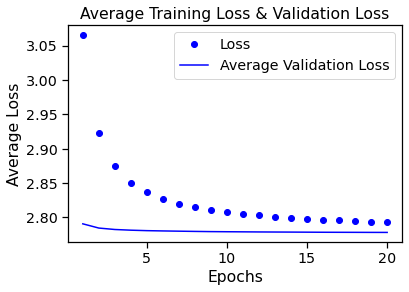

In [122]:
plot_loss(all_loss_6, all_loss_history_6)

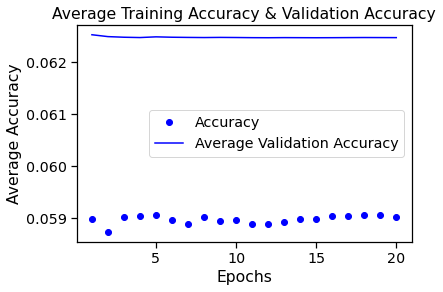

In [123]:
plot_acc(all_acc_6, all_acc_history_6)

In [124]:
print("Average Loss:", np.mean(all_val_loss_6))
print("Average Accuracy:", np.mean(all_val_acc_6))

Average Loss: 2.7792327284812925
Average Accuracy: 0.06247868351638317


The average accuracy for L1/L2=0.1 and L1/L2=0.001 are both 0.062. The average loss of the former slightly lower at 2.78 than the latter which was 3.54

Based on the results on our LSTM models with L1/L2 regularizers, both did not yield good results. This is most likely due to the fact that our model is underfitting and trained with a small epoch number. 

Hence, our final model will not include L1/L2 regularizers.

# Final LSTM Model

no matter how small my l1/l2 regularizer i set, the accuracy is always very low and hovers around the same value  (0.06). but the smaller l1/l2 regularizer value (0.001) gives me a much smaller loss (0.9) than the bigger l1/l2 regularizer (0.1) which gives me a loss of (3) . what does this mean? would it better to  just not apply l1/l2 regularizer to my model ?

In [87]:
######################################    IGNORE FROM HERE    #####################################

#### Building the model

In [ ]:
# Initialising the model 
overfit_lstm_model = Sequential()

# Defining model: add layers 
overfit_lstm_model.add(Embedding(
    max_words,
    EMBEDDING_VECTOR_LENGTH,
    input_length=max_len,
    weights=[embedding_matrix],
    trainable=True,
)) #glove embedding
overfit_lstm_model.add(LSTM(64)) #LSTM layer 
overfit_lstm_model.add(Dense(NUM_CLASSES, activation='softmax')) #dense layer - the last one

# Compile model
underfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(underfit_lstm_model.summary())

In [ ]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

K=4
num_val_samples = len(X_train_resampled)//K
num_epochs = 5

#new!
all_val_acc_3 = []
all_val_loss_3 = []

all_acc_3 = []
all_loss_3 = []
all_acc_history_3 = []
all_loss_history_3 = []

N_iterations=4
N_folds=5
        
for i in range(N_iterations):
    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
    
    for j, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
        print('processing fold', j)
        
        partial_train_data = X_train_resampled[train_index]
        val_data = X_train_resampled[val_index]
        
        partial_train_targets = y_train_resampled[train_index]
        val_targets = y_train_resampled[val_index]
        
        # One-hot encode the target labels
        partial_train_targets = to_categorical(partial_train_targets, num_classes=16)
        val_targets = to_categorical(val_targets, num_classes=16)
        
        # Train the model (in silent mode, verbose=0)
        overfit_lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        results_2 = overfit_lstm_model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=128, verbose=0, validation_data = (val_data, val_targets))
        
        # Evaluate the model on the validation data: loss and accuracy 
        val_loss, val_acc = overfit_lstm_model.evaluate(val_data, val_targets, verbose=0)
        all_val_acc_2.append(val_acc)
        all_val_loss_2.append(val_loss)
        
        acc = results_2.history['accuracy']
        all_acc_2.append(acc)
        acc_history = results_2.history['val_accuracy']
        all_acc_history_2.append(acc_history)
        
        loss = results_2.history['loss']
        all_loss_2.append(loss)
        loss_history = results_2.history['val_loss']
        all_loss_history_2.append(loss_history)

In [ ]:
# plot mae graph 
plot_mae(all_mae_history_1, num_epochs)

# Iterated K-fold on Overfit model 

In [ ]:
# create an overfit model 
overfit_lstm_model = models.Sequential()

# add multiple dense layers 
overfit_lstm_model.add

Just testing 

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
num_classes = 16
# underfit model 
underfit_model = Sequential()
underfit_model.add(layers.Dense(num_classes, activation='softmax')) 

In [ ]:
# compile model
underfit_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# train underfit model 
result1 = underfit_model.fit(X_train_lstm_pad, 
                             y_train_lstm_onehot,
                             epochs=10, 
                             batch_size=128)

In [ ]:
underfit_model.summary()

# Developing a model better than the baseline

## Evaluation Protocol: Iterated K-fold 
### LSTM model

In [ ]:
df_clean.shape

In [ ]:
# split data into training and testing
DATASET_SIZE=8675
TRAIN_RATIO=0.8
TEST_RATIO=0.2

X = df['posts']
y = df['type']

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(df_clean['posts'],df_clean['type'], 
                                         test_size=TEST_RATIO,
                                         random_state=0, 
                                         stratify= df.type) 

In [ ]:
print('X_train_lstm', X_train_lstm.shape)
print('X_test_lstm', X_test_lstm.shape)
print('y_train_lstm', y_train_lstm.shape)
print('y_test_lstm', y_test_lstm.shape)

In [ ]:
# create an instance of label encoder 
labelencoder= LabelEncoder()
# Fit and transform the labels to numerical format
y_train_lstm_enc = labelencoder.fit_transform(y_train_lstm)
y_test_lstm_enc = labelencoder.transform(y_test_lstm)

In [ ]:
from keras.utils import to_categorical

# One-hot encode the target labels
y_train_lstm_onehot = to_categorical(y_train_lstm_enc)
y_test_lstm_onehot = to_categorical(y_test_lstm_enc)

In [ ]:
from keras.preprocessing.text import Tokenizer
max_words = 2500
max_len = 40

# ensure all sequences in a list have the same length
def tokenize_pad_sequences(text):
    # initialise text tokenizer
    tokenizer = Tokenizer(num_words=max_words, filters="")
    
    # generate word indexes
    tokenizer.fit_on_texts(text)
    
    # transforms text to a sequence of integers and apply padding 
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len) #post padding  
    
    # return sequences 
    return X, tokenizer

In [ ]:
X_train_lstm_pad, tokenizer = tokenize_pad_sequences(X_train_lstm)
X_test_lstm_pad = tokenizer.texts_to_sequences(X_test_lstm)
X_test_lstm_pad = pad_sequences(X_test_lstm_pad, padding='post', maxlen=max_len)

In [ ]:
# Define the model 
model = Sequential()
DROPOUT = 0.1

# add glove embedding 
model.add(Embedding(
    max_words,
    EMBEDDING_VECTOR_LENGTH,
    input_length=max_len,
    weights=[embedding_matrix],
    mask_zero=True,
    trainable=True,
))

# add LSTM layer 
model.add(LSTM(
    EMBEDDING_VECTOR_LENGTH,
    dropout=DROPOUT,
    recurrent_dropout=0.1, 
    activation='softmax',
))

model.add(Dense(16, activation="softmax"))  # 16 classes for MBTI types

In [ ]:
# compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Optimizer

For this project, we will be using Adam as our optimizer as it is a combination of the best properties of AdaGrad, RMSprop and momentum. 

In addition, Adam generally works well in training deep learning models and outperforms other adaptive techniques. 

<b> Train LSTM model </b>

In [ ]:
### Preprocessing variables
MODEL_BATCH_SIZE = 128
EMBEDDING_VECTOR_LENGTH = 50

### Learning variables
LEARNING_RATE = 0.01
DROPOUT = 0.1
NUM_EPOCHS = 1

### Control variables
CROSS_VALIDATION = False
SAMPLE = True
WORD_CLOUD = True
SAVE_MODEL = True

# training 
model.fit(X_train_lstm_pad, 
          y_train_lstm_onehot, 
          epochs=NUM_EPOCHS, 
          batch_size=MODEL_BATCH_SIZE)

# Further improvements 

# References

https://stackoverflow.com/questions/53353785/difference-between-k-fold-and-iterated-k-fold-with-shuffling
    
    